# Non Negative Asymetric Auto Encoder
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Encoder architecture: infoGAN
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
* Non Neg Constraint on the weights of the decoder

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
from nonNegSparseShallowAE import Sparse_NonNeg_ShallowAE_KLsum_AsymDecay
from AsymAE_infoGAN.nonNeg_AsymAE_infoGAN import NonNegAsymAEinfoGAN_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print(x_small.shape)

(10, 28, 28, 1)


Original images and reconstructions - Test MSE:  0.008815295200049877


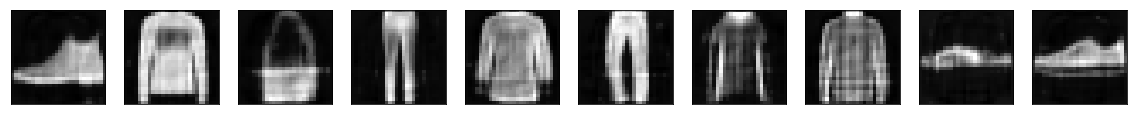

Histograms of encodings - Sparsity (Hoyer):  0.31658012


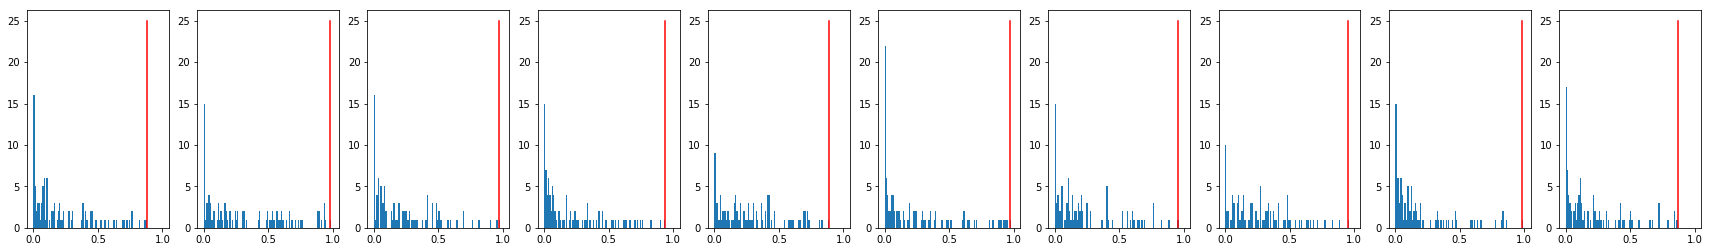

Atom images (weights of the encoder)


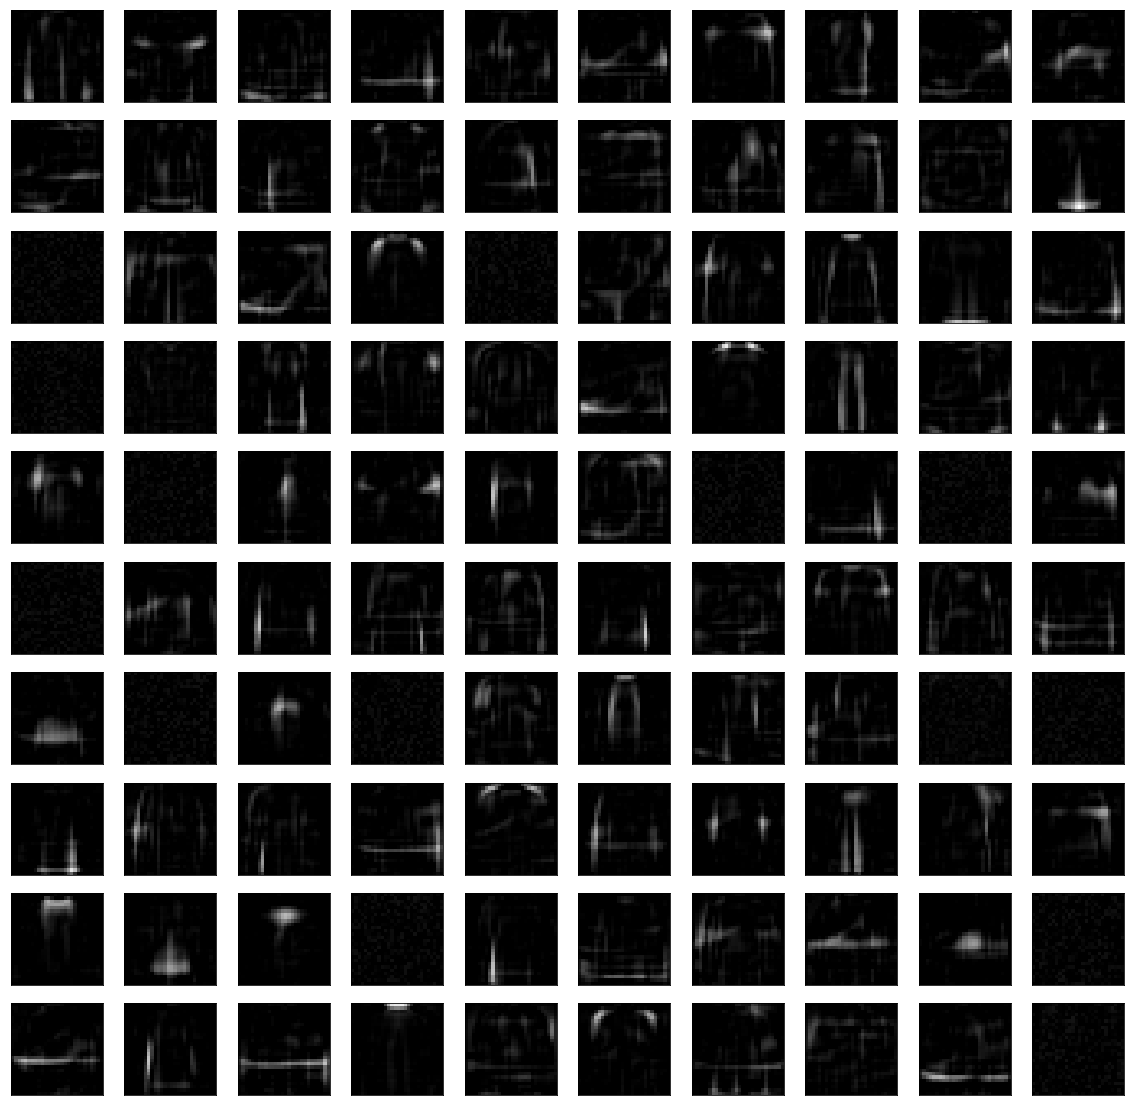

In [3]:
AE = NonNegAsymAEinfoGAN_NonNegConstraint.load('18_12_13_dim100_NonNegConstraint.h5')
print('Original images and reconstructions - Test MSE: ', AE.reconstruction_error(x_test))
AE.plot_reconstructions(x_small, plot_input=False)
print('Histograms of encodings - Sparsity (Hoyer): ', AE.sparsity_measure(x_test))
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images (weights of the encoder)')
AE.plot_atoms_decoder(nb_to_plot=100)

Dilatation of original images


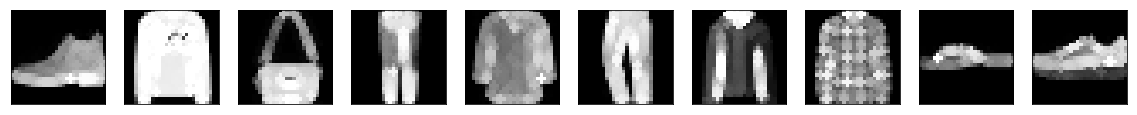

Dilatation of reconstructed images


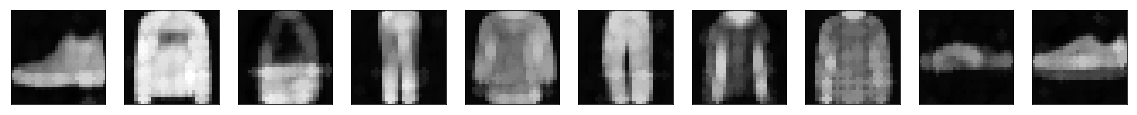

Max-approximation to dilatation
Max-approx error to original:  1.180845929813385  - Max-approx error to reconstruction:  1.2068333375930786


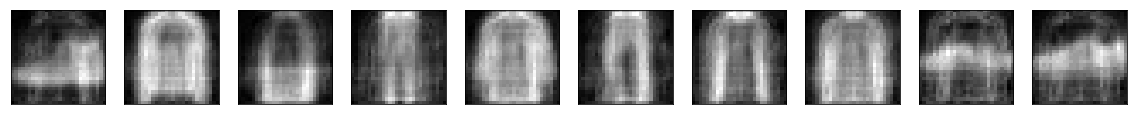

Dilatation of decoder weights


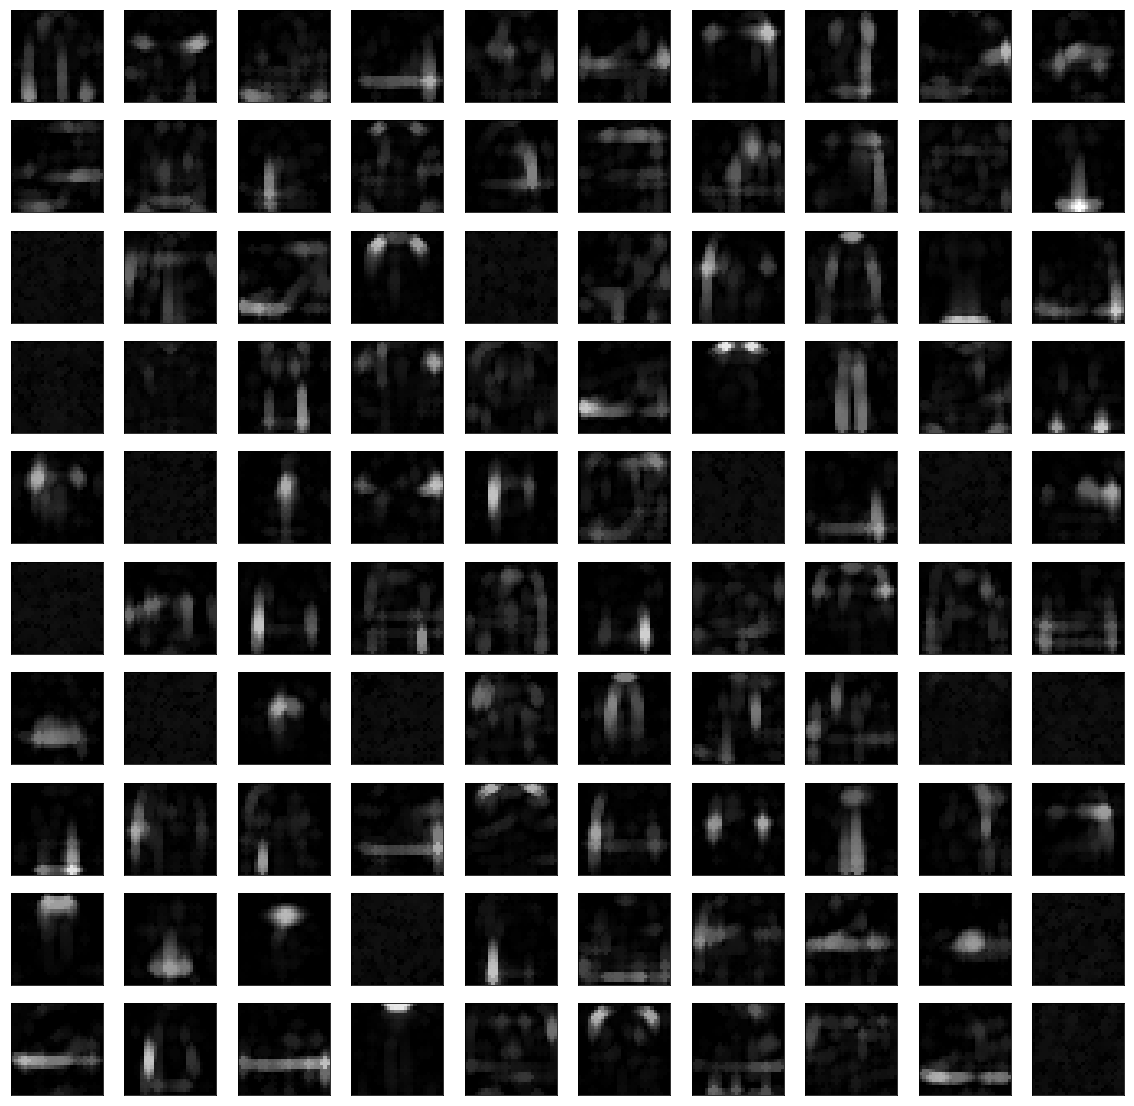

In [4]:
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Max-approximation to dilatation')
max_approx_err = AE.max_approximation_error(x_test, morphoMaths.dilatation, SE_scale=1)
print('Max-approx error to original: ', max_approx_err[0], ' - Max-approx error to reconstruction: ', max_approx_err[1])
AE_dil.plot_reconstructions(x_small, plot_input=False)
print('Dilatation of decoder weights')
AE_dil.plot_atoms_decoder()